Diabetic Diagnosis System

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Even there are no missing values, but the df.describe() shows that min value of Glucose, BloodPressure, SkinThickness and BMI is practically not possibale for any human. these values seems like missing values, where 0 is use as placeholder.

In [8]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

for column in columns_with_zeros:
    mean_value = df[column].mean()
    df[column] = df[column].replace(0, mean_value)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,79.799479,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,115.244002,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1


In [10]:
df.shape

(768, 9)

In [11]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Outcome', ylabel='count'>

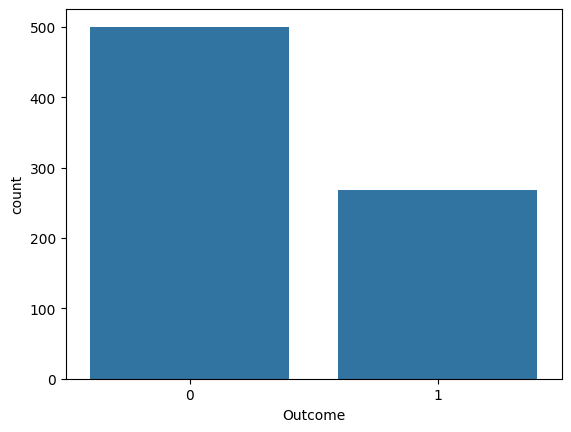

In [12]:
sns.countplot(x='Outcome', data=df)

The dataset is not extremlly imbalanced, but it is significant.

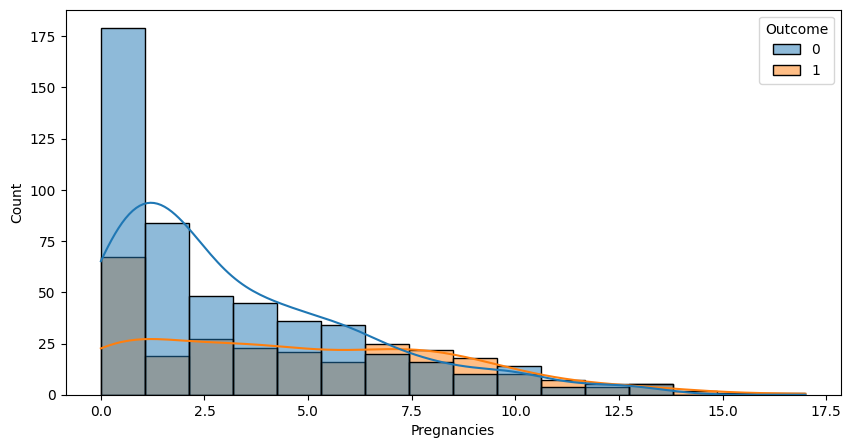

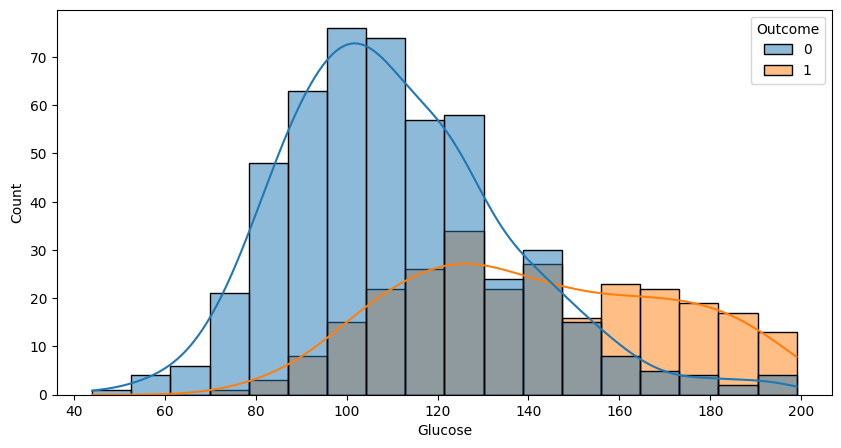

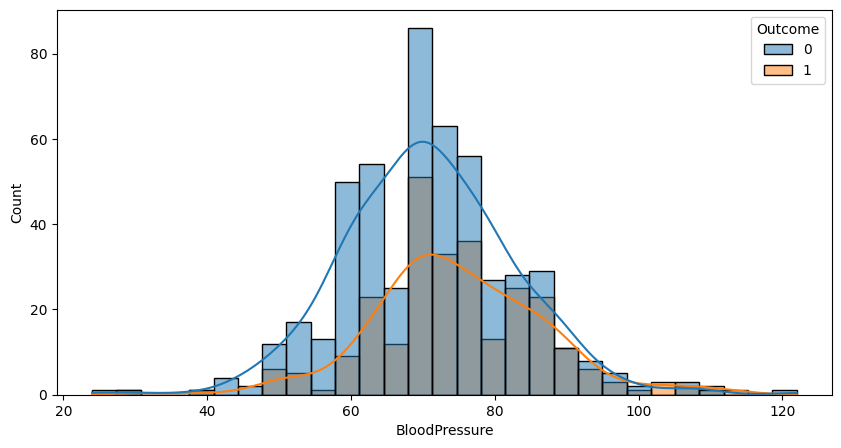

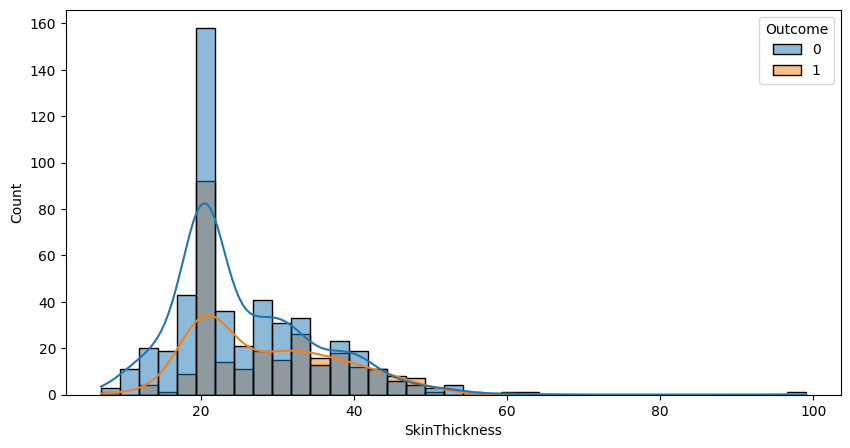

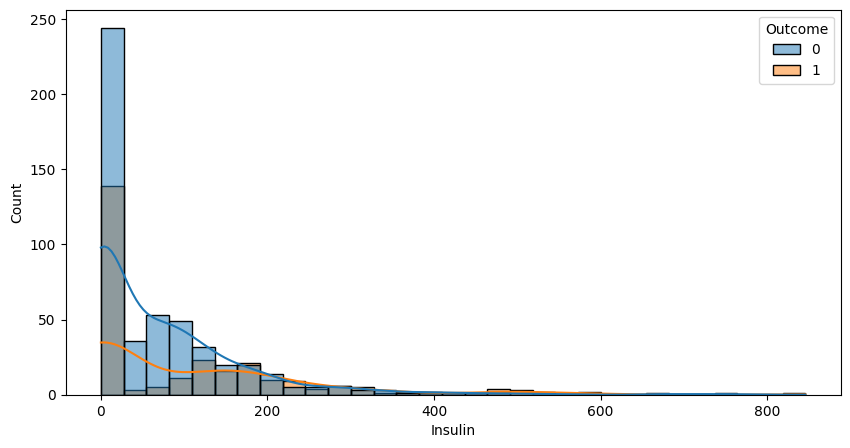

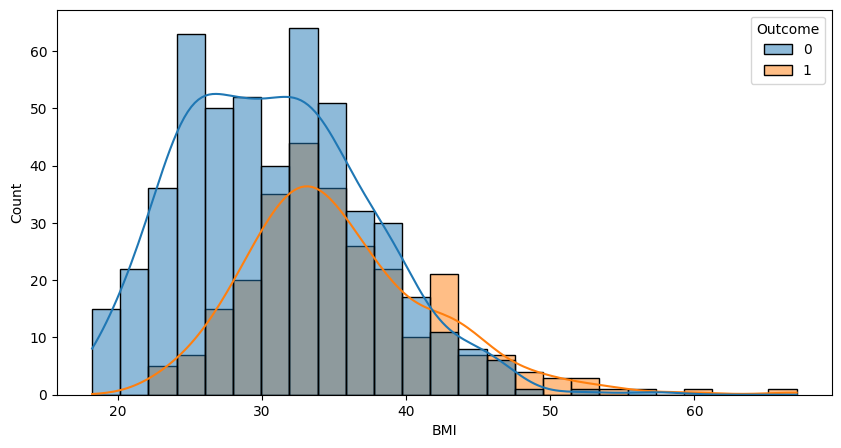

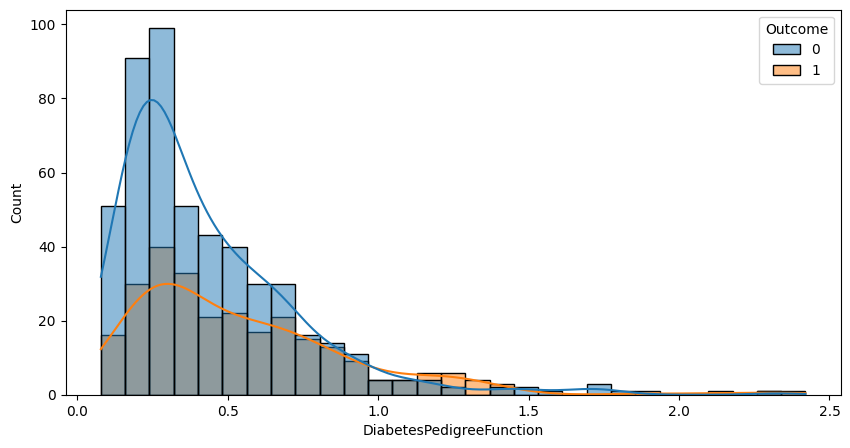

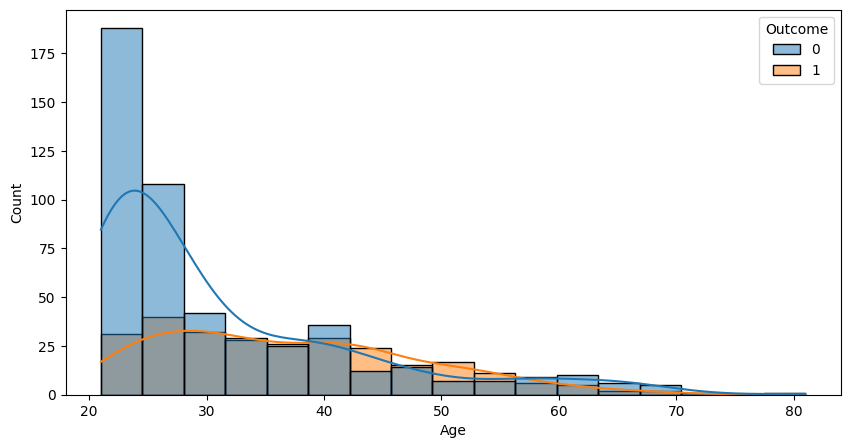

In [13]:
for i in df.columns:
    if i != 'Outcome':
        plt.figure(figsize=(10, 5))
        sns.histplot(data=df, x=i, hue='Outcome', kde=True)

The higher values of Glucose, BMI, and Age have strong indication of diabetes. The pregnancies and diabetesPedigreeFunction also seems good predictors for diabetes, where as the BloodPressure and SkinThickness are doesn't seems greate predictors as compare to the Glucose, BMI and Age.

There is massive spike in insulin, around the zero which is not possibel for human, seems it was missed.

In [14]:
mean_value = df['Insulin'].mean()
df['Insulin'] = df['Insulin'].replace(0, mean_value)

<Axes: >

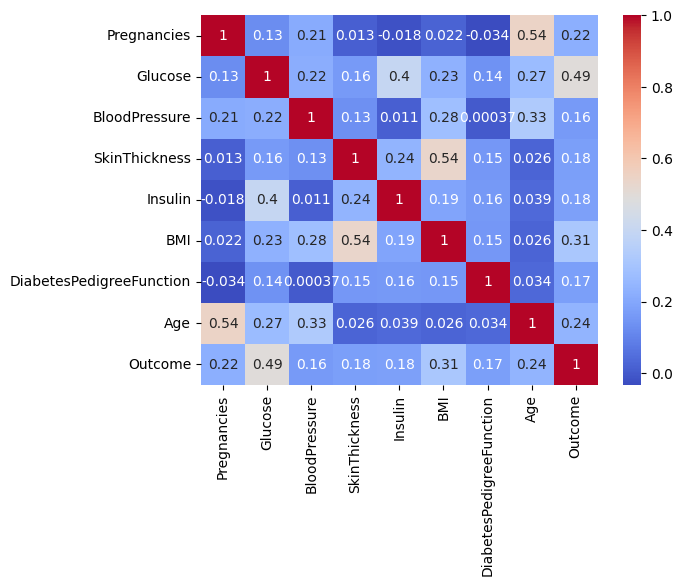

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

The Glucose seems to have the storng relation with the outcome followed by BMI, Age and Pregnancies, other have significant positive relation. 

Also, the heatmap shows the correlation between age and pregnancies, and BMI and skinThickness. The BMI and SkinThickness correlation is also the logical and the multicollinearity here does not seem as major issue right now.

In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
y_pred = log_reg_model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7662337662337663
Confusion Matrix:
[[83 16]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



The Logistic Regression Model is the simplest model and has effectively given good results, but in fields of medical, we reqired more, so lets try the complex model like Random Forest.

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
rf_y_pred = rf_model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, rf_y_pred)
conf_matrix = confusion_matrix(y_test, rf_y_pred)
class_report = classification_report(y_test, rf_y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7402597402597403
Confusion Matrix:
[[77 22]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



Random Forest does not slove the problem, it might be the model has bised due to the imbalanced dataset, lets try the same random forest model with the balanced dataset

In [25]:
balanced_rf_model = RandomForestClassifier(class_weight='balanced')
balanced_rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
balanced_rf_y_pred = balanced_rf_model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, balanced_rf_y_pred)
conf_matrix = confusion_matrix(y_test, balanced_rf_y_pred)
class_report = classification_report(y_test, balanced_rf_y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7337662337662337
Confusion Matrix:
[[78 21]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



The balance dataset does not helps here. It has not significantly effected the model accuracy much.

To have best recall for the diabetic class, lets perform the GridSearchCV to find best Random Forest model with best hyperparameters.

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 100, 150],
    'max_depth' : [None, 10, 20],
    'criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [30]:
best_parms = grid_search.best_params_

print(f'Best Hyperparameters: {best_parms}')

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}


In [31]:
best_model = grid_search.best_estimator_

best_y_pred = best_model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, best_y_pred)
conf_matrix = confusion_matrix(y_test, best_y_pred)
class_report = classification_report(y_test, best_y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7792207792207793
Confusion Matrix:
[[80 19]
 [15 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



The recall score we achived is best so far, and the Flase neagative has also fallen to 15 from 20 we started with. Also we have got the best accuracy so far 77.9%.

In [33]:
import joblib

joblib.dump(best_model, 'diabetes_model.joblib')

joblib.dump(scaler, 'scaler.joblib')

print("Model and Scaler saved successfully.")

Model and Scaler saved successfully.
